In [1]:
import numpy as np

In [2]:
#KNN 회귀 방법은 데이터 범위 밖의 데이터를 예측할 수 없음

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42, 1) (14, 1) (42,) (14,)


In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


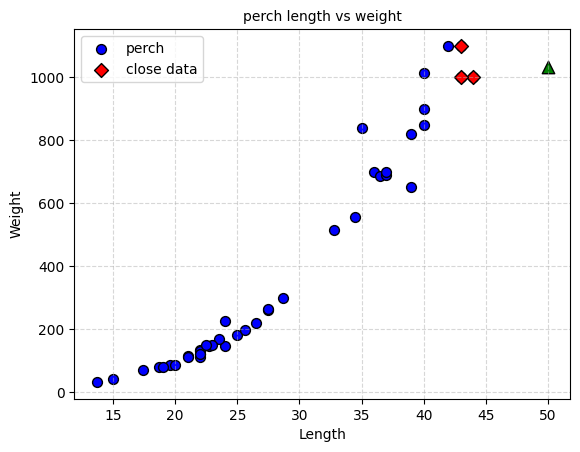

In [18]:
import matplotlib.pyplot as plt
distance, indexes = knr.kneighbors([[50]])

# 산점도 그리기
plt.scatter(train_input,train_target, label='perch', color='blue', marker='o', edgecolors=(0, 0, 0), s= 50)
plt.scatter(train_input[indexes],train_target[indexes], label='close data', color='red', marker='D', edgecolors=(0, 0, 0), s= 50)

#50cm 농어 데이터
plt.scatter(50, 1033, color='green', marker= '^',edgecolors=(0, 0, 0), s= 80)

# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('perch length vs weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()



# 그래프 출력
plt.show()

In [19]:
print(np.mean(train_target[indexes]))

1033.3333333333333


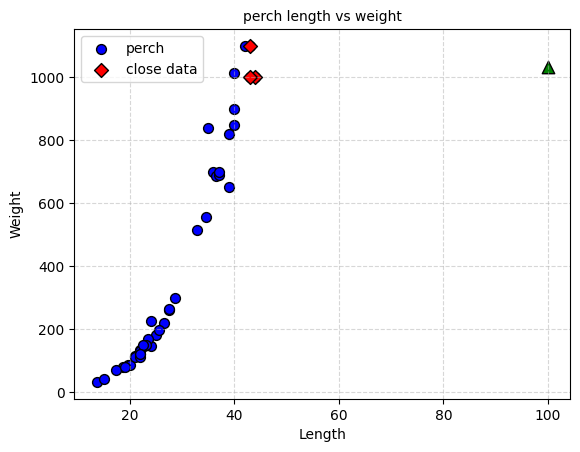

In [20]:
import matplotlib.pyplot as plt
distance, indexes = knr.kneighbors([[100]])

# 산점도 그리기
plt.scatter(train_input,train_target, label='perch', color='blue', marker='o', edgecolors=(0, 0, 0), s= 50)
plt.scatter(train_input[indexes],train_target[indexes], label='close data', color='red', marker='D', edgecolors=(0, 0, 0), s= 50)

#50cm 농어 데이터
plt.scatter(100, 1033, color='green', marker= '^',edgecolors=(0, 0, 0), s= 80)

# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('perch length vs weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()



# 그래프 출력
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [24]:
#linearRegression클래스의 a, b는 각각 아래와 같음
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


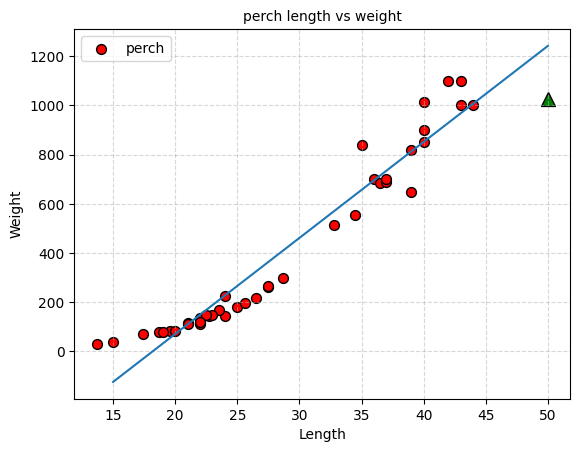

In [27]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(train_input,train_target, label='perch', color='red', marker='o', edgecolors=(0, 0, 0), s= 50)

#15에서 50까지 1차식
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1024.8, color='green', marker='^', edgecolors=(0, 0, 0), s= 100)

# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('perch length vs weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()



# 그래프 출력
plt.show()

In [28]:
print(lr.score(train_input,train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


In [32]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2,test_input))

print(train_poly.shape, test_poly.shape)
print(train_poly[:5,:],'\n','\n', test_poly[:5,:])

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]] 
 
 [[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [34]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


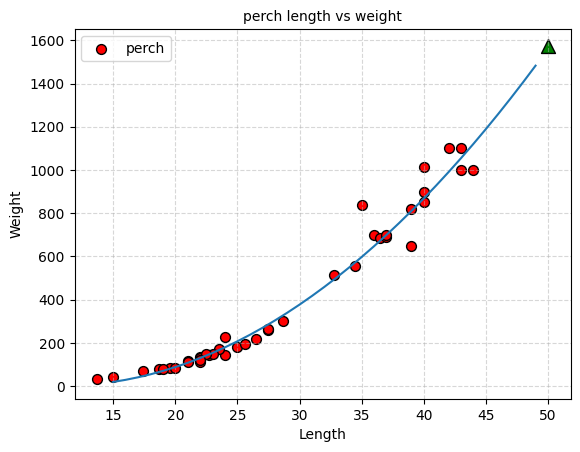

In [37]:
import matplotlib.pyplot as plt

#점점점찍으면서 2차식 그리기위해서 효율적이지는 않은듯?
point = np.arange(15,50)

# 산점도 그리기
plt.scatter(train_input,train_target, label='perch', color='red', marker='o', edgecolors=(0, 0, 0), s= 50)

#15에서 50까지 1차식
plt.plot(point, 1.01*point**2-21.6*point+116.05)

#50cm 농어 데이터
plt.scatter(50, 1574, color='green', marker='^', edgecolors=(0, 0, 0), s= 100)

# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('perch length vs weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()



# 그래프 출력
plt.show()

In [38]:
#R^2값
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#아직 과소적합남아있음

0.9706807451768623
0.9775935108325122
